In [7]:
# Importation des bibliothèques nécessaires
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
real_annotations_file = "/home/pionner01/auto-annotation/african_data_collector/storage/meta_data_image.csv" 
generated_annotations_file = "/home/pionner01/auto-annotation/annotation/storage/annotations_blip2.csv"  

# Charger les DataFrames
real_annotations_df = pd.read_csv(real_annotations_file)
generated_annotations_df = pd.read_csv(generated_annotations_file)

# Fusionne les DataFrames sur 'filename' et 'image_name'
merged_df = pd.merge(real_annotations_df, generated_annotations_df, left_on='filename', right_on='image_name', suffixes=('_real', '_generated'))

# Afficher les premières lignes du DataFrame fusionné
merged_df.head()


,filename,description,category,image_name,annotation
0,image_1.jpeg,Several freshly caught tilapia fish are placed...,fish farming,image_1.jpeg,a bucket full of fish sitting on top of a scale
1,image_2.jpeg,View of a cultivated field of leafy vegetables...,agriculture,image_2.jpeg,a field of green vegetables with people workin...
2,image_3.jpeg,An agronomist is giving an interview in a spin...,agriculture,image_3.jpeg,a man standing in a field with lettuce plants
3,image_4.jpeg,A woman holds a machete and harvests spinach (...,rural work,image_4.jpeg,a woman is working in a field of green plants
4,image_5.jpeg,"A group of cattle moves through the forest, wh...",wildlife,image_5.jpeg,cattle grazing in a field with birds flying ar...


In [10]:
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Fonction pour calculer les scores de similarité cosinus
def calculate_similarity(row):
    # Encoder les annotations en vecteurs
    real_embedding = model.encode(row['description'])
    generated_embedding = model.encode(row['annotation'])
    
    # Calculer le score de similarité
    similarity = cosine_similarity([real_embedding], [generated_embedding])[0][0]
    return similarity

# Ajouter la colonne 'similarity_score' avec les scores de similarité
merged_df['similarity_score'] = merged_df.apply(calculate_similarity, axis=1)

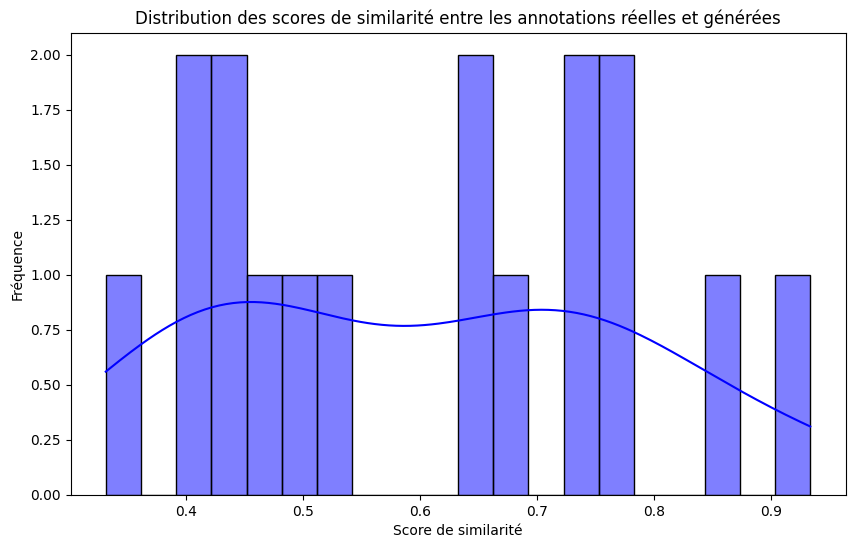

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['similarity_score'], kde=True, color='blue', bins=20)
plt.title('Distribution des scores de similarité entre les annotations réelles et générées')
plt.xlabel('Score de similarité')
plt.ylabel('Fréquence')
plt.show()

In [12]:
merged_df.head(20)  # Afficher les premières lignes du DataFrame


,filename,description,category,image_name,annotation,similarity_score
0,image_1.jpeg,Several freshly caught tilapia fish are placed...,fish farming,image_1.jpeg,a bucket full of fish sitting on top of a scale,0.650899
1,image_2.jpeg,View of a cultivated field of leafy vegetables...,agriculture,image_2.jpeg,a field of green vegetables with people workin...,0.733745
2,image_3.jpeg,An agronomist is giving an interview in a spin...,agriculture,image_3.jpeg,a man standing in a field with lettuce plants,0.409309
3,image_4.jpeg,A woman holds a machete and harvests spinach (...,rural work,image_4.jpeg,a woman is working in a field of green plants,0.679743
4,image_5.jpeg,"A group of cattle moves through the forest, wh...",wildlife,image_5.jpeg,cattle grazing in a field with birds flying ar...,0.760173
5,image_6.jpeg,Bags filled with birds are placed next to people.,trade,image_6.jpeg,a group of men standing around a pile of sacks,0.484764
6,image_7.jpeg,"A bull is stopped next to an iron, in a recent...",land work,image_7.jpeg,a woman in yellow shirt standing in the middle...,0.395348
7,image_8.jpeg,A pump installed in a well brings water to the...,water resources,image_8.jpeg,a man is using a hose to clean a hole in the g...,0.515146
8,image_9.jpeg,Children are drawing water from a pond using b...,rural life,image_9.jpeg,children washing water in a stream,0.754214
9,image_10.jpeg,A person is standing in a river.,rural life,image_10.jpeg,two boys are playing in the water in a river,0.466546


In [13]:
# Afficher un échantillon du DataFrame avec les scores de similarité
print(merged_df[['filename', 'description', 'annotation', 'similarity_score']].head())


                filename                                        description  \
0  african_village_0.jpg                         A girl sent on an errand.    
1  african_village_1.jpg                Sunset tree in Kenya Safari, Africa   
2  african_village_2.jpg  Taken on a trip in 2016 with World Vision to S...   
3  african_village_3.jpg                             Road in Mukono, Uganda   
4  african_village_4.jpg  Taken on a trip in 2016 with World Vision to S...   

                                          annotation  similarity_score  
0    a young girl carrying a basket of dirty clothes          0.350512  
1        a lone tree stands in the middle of a field          0.427833  
2  women in african traditional dress standing in...          0.313799  
3  a busy street with many people walking and rid...          0.356939  
4  a young girl smiles as she is surrounded by ot...          0.065381  


/tmp/ipykernel_220221/2093254477.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=score_categories, y=count_categories, palette='Blues')


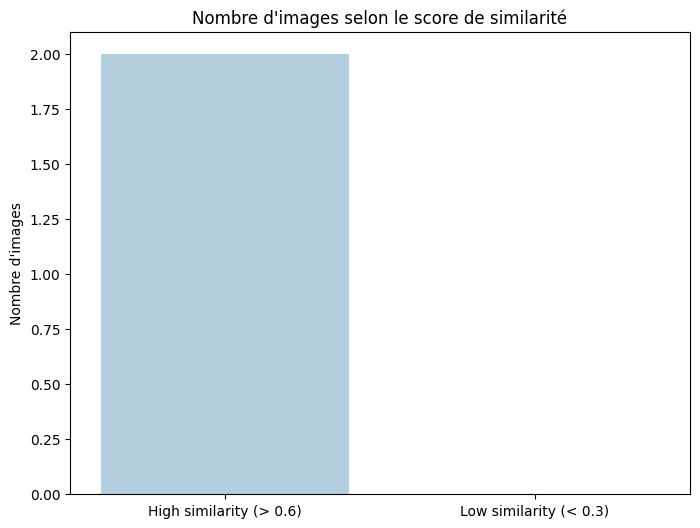

In [13]:
# Catégoriser les images selon les scores
high_score = merged_df[merged_df['similarity_score'] > 0.8]
low_score = merged_df[merged_df['similarity_score'] < 0.3]

# Visualiser le nombre d'images par catégorie
score_categories = ['High similarity (> 0.6)', 'Low similarity (< 0.3)']
count_categories = [high_score.shape[0], low_score.shape[0]]

plt.figure(figsize=(8, 6))
sns.barplot(x=score_categories, y=count_categories, palette='Blues')
plt.title("Nombre d'images selon le score de similarité")
plt.ylabel("Nombre d'images")
plt.show()

In [14]:
# Catégoriser les images en fonction de leur score de similarité
high_similarity = merged_df[merged_df['similarity_score'] > 0.8]  # Très bon score
moderate_similarity = merged_df[(merged_df['similarity_score'] > 0.5) & (merged_df['similarity_score'] <= 0.8)]  # Bon score
low_similarity = merged_df[merged_df['similarity_score'] <= 0.5]  # Faible score

# Visualiser le nombre d'images par catégorie
print(f"Nombre d'annotations très bonnes (score > 0.8): {high_similarity.shape[0]}")
print(f"Nombre d'annotations bonnes (score entre 0.5 et 0.8): {moderate_similarity.shape[0]}")
print(f"Nombre d'annotations faibles (score < 0.5): {low_similarity.shape[0]}")


Nombre d'annotations très bonnes (score > 0.8): 2
Nombre d'annotations bonnes (score entre 0.5 et 0.8): 8
Nombre d'annotations faibles (score < 0.5): 7


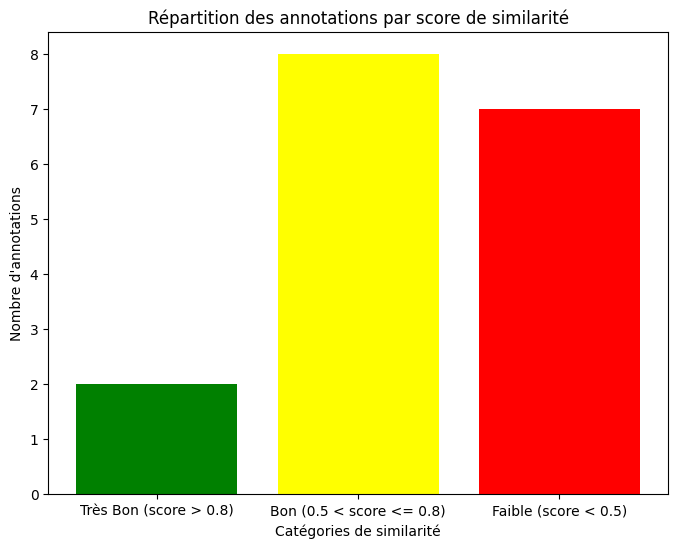

In [15]:
categories = ['Très Bon (score > 0.8)', 'Bon (0.5 < score <= 0.8)', 'Faible (score < 0.5)']
values = [high_similarity.shape[0], moderate_similarity.shape[0], low_similarity.shape[0]]

plt.figure(figsize=(8, 6))
plt.bar(categories, values, color=['green', 'yellow', 'red'])
plt.title("Répartition des annotations par score de similarité")
plt.xlabel("Catégories de similarité")
plt.ylabel("Nombre d'annotations")
plt.show()